## Hands-on - Probability Distributions and Variability

Name: Kamonnun Silarat <br>
Date: 02.04.2025

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau

# Additional Note: Additional imported library for data visualizations
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv"
df = pd.read_csv(file_path)

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


### **Question 1: Check for missing values**
- Check for any **missing values** in each column.

In [2]:
# Your code here:
missing_values = df.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: date     0
value    0
dtype: int64


### **Question 2: Compute the Covariance Between Consecutive Days**
- Create a new column: **"Previous Day Views"**, which contains the previous day's pageviews.
- Compute the covariance between **"value"** (current day's views) and **"Previous Day Views"**.


Covariance Matrix:

                           value  Previous Day Views
value               3.520547e+09        2.417820e+09
Previous Day Views  2.417820e+09        3.517486e+09


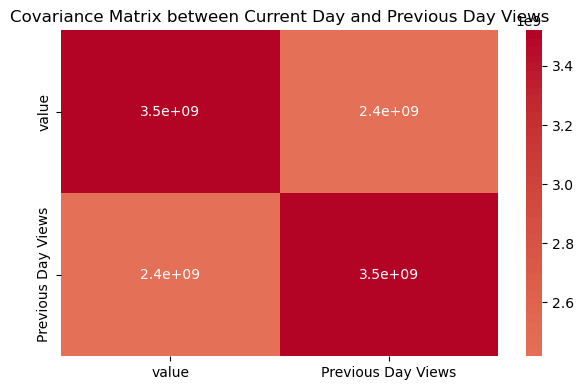

In [10]:
# Your code here:
df['Previous Day Views'] = df['value'].shift(1)
df_clean = df.dropna()
cov_matrix = df_clean[['value', 'Previous Day Views']].cov()
print("Covariance Matrix:\n")
print(cov_matrix)

# Plot the display of the covariance matrix:
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Covariance Matrix between Current Day and Previous Day Views")
plt.tight_layout()
plt.show()

### **Question 3: Compute Pearson, Spearman, and Kendall Correlation Between Pageviews and Previous Day Views**
- Compute and compare three different correlation measures?


Pearson Correlation:
                        value  Previous Day Views
value               1.000000            0.687073
Previous Day Views  0.687073            1.000000

Spearman Correlation:
                        value  Previous Day Views
value               1.000000            0.932921
Previous Day Views  0.932921            1.000000

Kendall Correlation:
                        value  Previous Day Views
value               1.000000            0.788719
Previous Day Views  0.788719            1.000000


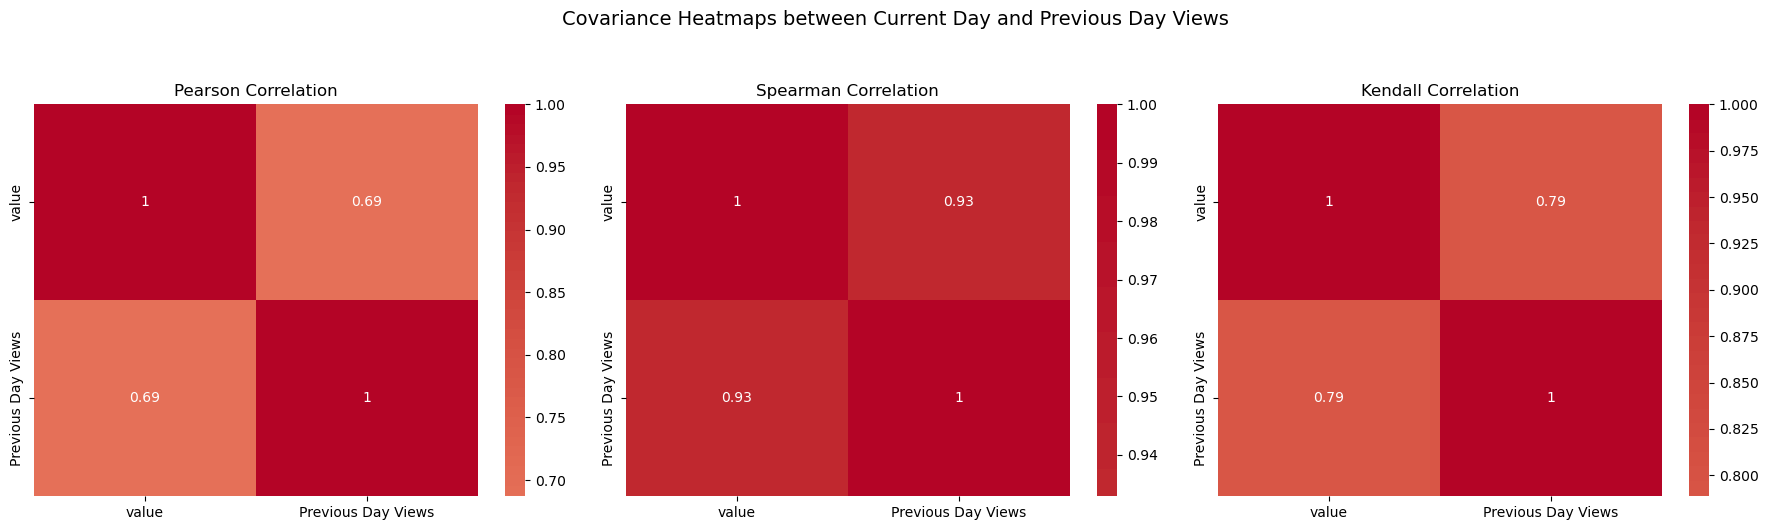

In [11]:
# Your code here:
df['Previous Day Views'] = df['value'].shift(1)
df_clean = df.dropna()
cols = ['value', 'Previous Day Views']

# Compute correration matrices
pearson_corr = df_clean[cols].corr(method='pearson')
spearman_corr = df_clean[cols].corr(method='spearman')
kendall_corr = df_clean[cols].corr(method='kendall')

# Display correration matrices for each type of correration:
print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)
print("\nKendall Correlation:\n", kendall_corr)

# Plot all the heatmaps in one figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# For Pearson Matrix:
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation")
# For Spearman Matrix:
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation")
# For Kendall Matrix:
sns.heatmap(kendall_corr, annot=True, cmap="coolwarm", center=0, ax=axes[2])
axes[2].set_title("Kendall Correlation")

plt.suptitle("Covariance Heatmaps between Current Day and Previous Day Views", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# For output display: recommend to zoom in for clearer vision

### **Question 4: Train a Simple Linear Regression Model to Predict Pageviews**
- Convert **"date"** to numeric values (days since the start).
- Train a linear regression model to predict **"value"** (pageviews) using **"time"**.


In [12]:
# Your code here:
# Convert the column to datetime and create the variable as the numeric value
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Define independent and dependent variables
X = df[['days_since_start']]
y = df['value']

# Split into training and test sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Question 5: Evaluate the Regression Model**
- Compute R-squared and Mean Squared Error (MSE).
- Discuss the model's performance.


In [13]:
# Your code here:
# Predict values on test set
y_predict = model.predict(X_test)

# Display the results
print("Linear Regression Results:")
print("Intercept:", model.intercept_)
print("Coefficient (slope):", model.coef_[0])
print("R² score:", r2_score(y_test, y_predict))
print("Mean Squared Error:", mean_squared_error(y_test, y_predict))

Linear Regression Results:
Intercept: 9420.177493193281
Coefficient (slope): 87.14583238298792
R² score: 0.22850595237500682
Mean Squared Error: 5013656953.8723545


### **Additional Cell: Linear Regression Model Summary:**
* Intercept: 9420.18
* Coefficient: 87.146
* R² Score: 0.23
* Mean Squared Error (MSE): Approximately 5 billion

### **Question 6: Test Whether Pageviews Have Increased Over Time**
- Compare mean pageviews in the first 30 days vs. the last 30 days.
- Perform a one-sample T-test

In [14]:
# Your code here:
# Convert the column to datetime and sort the data
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# First and last 30 days of pageviews
first_30 = df['value'].iloc[:30]
last_30 = df['value'].iloc[-30:]

# One-sample T-test: last and first 30 days' mean statement
t_stat, p_val = stats.ttest_1samp(last_30, popmean=first_30.mean())

# Display the results
print("One Sample T-Test (Last 30 Days v First 30 Days)")
print(f"First 30 days Mean: {first_30.mean():.2f}")
print(f"Last 30 days Mean: {last_30.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.2f}") # P-value less than 0.05 means it has a significant difference in sea level between two centuries

One Sample T-Test (Last 30 Days v First 30 Days)
First 30 days Mean: 11683.03
Last 30 days Mean: 184514.47
T-statistic: 22.3405
P-value: 0.00
